In [4]:
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np

from d2l.tensorflow import config

config.setup('CPU')

Tensorflow running on CPU


In [5]:
embedding = 4 # embedding dimension for autoregressive model
T = 1000 # generate a total of 1000 points
time = np.arange(0,T)
x = np.sin(0.01 * time) + 0.2 * np.random.normal(size=(T))

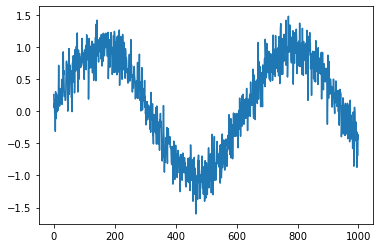

In [6]:
plt.plot(time, x);

## Regression Dataset

In [13]:
features = np.zeros((T-embedding, embedding))
for i in range(embedding):
    features[:,i] = x[i:T-embedding+i]
    labels = x[embedding:]

ntrain = 600
X_train, y_train = (features[:ntrain,:], labels[:ntrain])
X_test, y_test = (features[ntrain:,:], labels[ntrain:])

In [14]:
net = keras.models.Sequential()
net.add(keras.layers.Dense(10, activation='relu'))
net.add(keras.layers.Dense(10, activation='relu'))
net.add(keras.layers.Dense(1))

## Training

In [15]:
batch_size = 16
optimizer = keras.optimizers.Adam(learning_rate=0.01)
epochs = 5
loss = keras.losses.MeanSquaredError()

net.compile(optimizer=optimizer, loss=loss)

In [16]:
hist = net.fit(X_train, y_train, epochs=epochs, validation_data=(X_test, y_test))

Epoch 1/5
19/19 [==============================] - 0s 8ms/step - loss: 0.2252 - val_loss: 0.1252
Epoch 2/5
19/19 [==============================] - 0s 3ms/step - loss: 0.0850 - val_loss: 0.0797
Epoch 3/5
19/19 [==============================] - 0s 3ms/step - loss: 0.0636 - val_loss: 0.0650
Epoch 4/5
19/19 [==============================] - 0s 3ms/step - loss: 0.0544 - val_loss: 0.0611
Epoch 5/5
19/19 [==============================] - 0s 3ms/step - loss: 0.0529 - val_loss: 0.0601


## Results

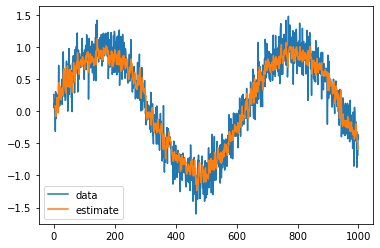

In [19]:
estimates = net(features).numpy()
plt.plot(time, x, label='data')
plt.plot(time[embedding:], estimates, label='estimate')
plt.legend()
plt.show()

## Predictions for more than 1 step

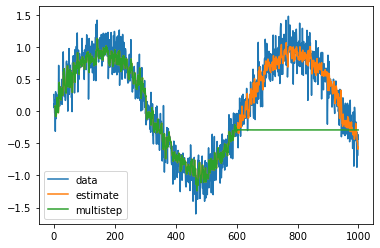

In [22]:
predictions = np.zeros_like(estimates)
predictions[:(ntrain-embedding)] = estimates[:(ntrain-embedding)]
for i in range(ntrain-embedding, T-embedding):
    predictions[i] = net(predictions[(i-embedding):i].reshape(1,-1)).numpy().reshape(1)
plt.plot(time, x, label='data')
plt.plot(time[embedding:], estimates, label='estimate')
plt.plot(time[embedding:], predictions, label='multistep')
plt.legend()
plt.show()

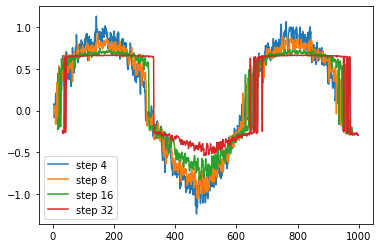

In [23]:
k = 33 # look up to k - embedding steps ahead
features = np.zeros((T-k, k))
for i in range(embedding):
    features[:,i] = x[i:T-k+i]
for i in range(embedding, k):
    features[:,i] = net(features[:,(i-embedding):i]).numpy().reshape((-1))
for i in (4, 8, 16, 32):
    plt.plot(time[i:T-k+i], features[:,i], label=('step {}'.format(i)))
plt.legend()
plt.show()